# Capital Bikeshare 共享单车数据探索

# 导入必要的工具包

In [32]:
import numpy as np # 矩阵运算
import pandas as pd # 数据处理

import matplotlib.pyplot as plt # 可视化
import seaborn as sns # 可视化

#图形出现在代码下方，不是新建窗口
%matplotlib inline 

# 读取数据

In [33]:
#使用pandas读取.csv格式数据
data = pd.read_csv("Bike-Sharing-Dataset/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 数据基本信息

In [34]:
data.shape

(731, 16)

In [35]:
# 2011年的数据作为训练数据，其标志为 yr == 0, 维度(365, 16)
# 2012年的数据作为测试数据，其标志为 yr = 1， 维度(366, 16)
data_2011 = data[data.yr==0]
data_2012 = data[data.yr==1]
data_2011.shape
#data_2012.shape

(365, 16)

In [36]:
#查看测试数据基本信息——共365个样本，16列，其中最后三列为真值，本项目只对cnt进行预测
data_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 16 columns):
instant       365 non-null int64
dteday        365 non-null object
season        365 non-null int64
yr            365 non-null int64
mnth          365 non-null int64
holiday       365 non-null int64
weekday       365 non-null int64
workingday    365 non-null int64
weathersit    365 non-null int64
temp          365 non-null float64
atemp         365 non-null float64
hum           365 non-null float64
windspeed     365 non-null float64
casual        365 non-null int64
registered    365 non-null int64
cnt           365 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 48.5+ KB


In [37]:
# 查看是否有空值——无空值
data_2011.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [38]:
# 各属性的统计特性——个数、均值、标准差、最小值、4分位数、最大值
data_2011.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,0.0,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,677.402740,2728.358904,3405.761644
std,105.510663,1.110946,0.0,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,556.269121,1060.110413,1378.753666
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,92.000000,2.000000,0.0,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,222.000000,1730.000000,2132.000000
50%,183.000000,3.000000,0.0,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,614.000000,2915.000000,3740.000000
75%,274.000000,3.000000,0.0,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,871.000000,3632.000000,4586.000000
max,365.000000,4.000000,0.0,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,3065.000000,4614.000000,6043.000000


# 2011年的测试数据集分析

第一个属性：instant（目录号）只是作为训练数据序号，对数据训练无太大意义，无做图分析必要

第二个属性：dteday（日期）是一个确定变化并累积的数值，在整个数据集中无重复，与序号属于同一类别数据，对数据训练意义不大

第四个属性：yr（年份）是作为分割训练集和测试集的标志，在同一个训练集中或同一个测试集中，数值保持不变，无训练价值

第十四个属性：casual（非注册用户数）属于真值，用于和预测值做对比，本作业不选该属性进行预测

第十五个属性：registered（注册用户数）属于真值，用于和预测值对比，本作业不选该属性进行预测

第十六个属性：cnt（租车人数）属于真值，用于和预测值对比，属于本作业的相应变量y

实际训练中，将drop掉以上六个属性，作业要求中最后三个属性都可以做为预测值，但只选择其中一个，即cnt，猜测注册用户数、非注册用户数和租车人数之间存在强相关性，在做相关性分析时将进行验证

# 单变量分布分析

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


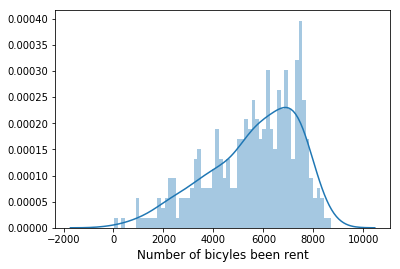

In [39]:
fig = plt.figure() #新建绘图
sns.distplot(data_2012.cnt.values, bins=60, kde=True)#60个方形，显示核密度分布曲线，显示测试集的y真值分布
plt.xlabel('Number of bicyles been rent', fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


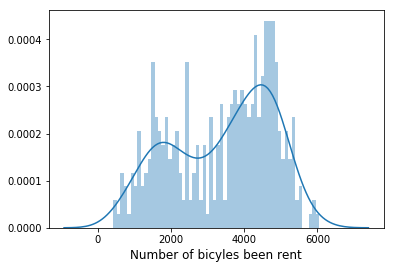

In [40]:
# 目标y（租车人数）的直方图 / 分布
fig = plt.figure() #新建绘图
sns.distplot(data_2011.cnt.values, bins=60, kde=True)#60个方形，显示核密度分布曲线，显示训练集的y真值分布
plt.xlabel('Number of bicyles been rent', fontsize=12)
plt.show()

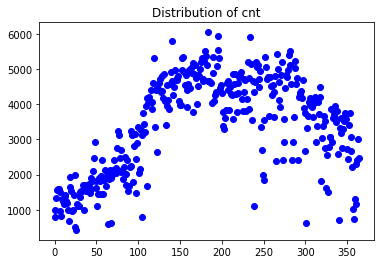

In [41]:
# 单个特征散点图
plt.scatter(range(data_2011.shape[0]), data_2011["cnt"].values, color='blue')
plt.title("Distribution of cnt");

从上面三个图可以看出：

1、真值cnt在一个区间中是连续的，故本题属于回归问题

2、2011年数据主要集中在4700左右，其次是1800左右，说明共享单车的日租借量为4700数量级别的占多数，其次是1800左右，此特征和正态分布不符合；

3、从2011年的直方图和散点图中可看出，高于5700左右的数据非常少，可能属于离群点，在训练时候可以剔除，否则会影响最后的预测值与真值残差的分布，即预测的准确性

4、2012年的数据形状有点像正态分布，与2011年很不一样，而且数量级整体大于2011年的数据

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


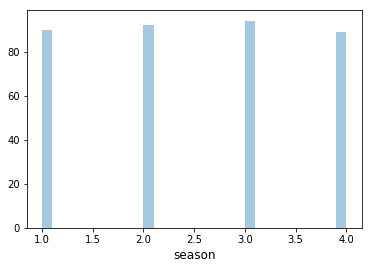

In [42]:
fig = plt.figure()
sns.distplot(data_2011.season.values, bins=30, kde=False)
plt.xlabel('season', fontsize=12)
plt.show()


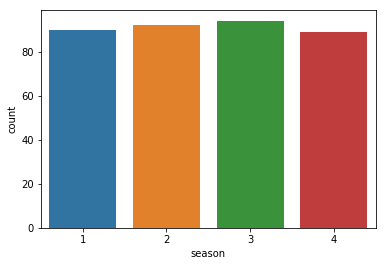

In [43]:
sns.countplot(data_2011.season);
plt.xlabel('season');

上图的数据表明了训练集中包含了4个季节的数据，且每个季节所分配的数据量比较平均

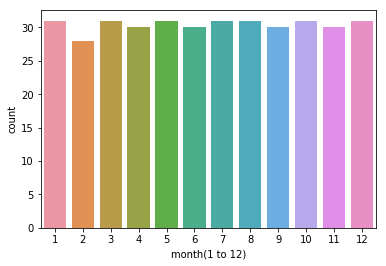

In [44]:
sns.countplot(data_2011.mnth);
plt.xlabel('month(1 to 12)');

上图的数据表明了训练集中包含了12个月份的数据，且每个月份所分配的数据量比较平均

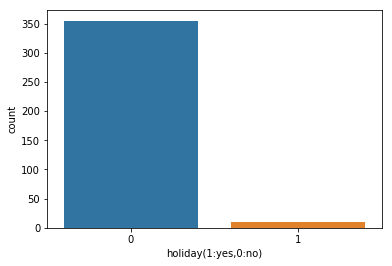

In [45]:
sns.countplot(data_2011.holiday);
plt.xlabel('holiday(1:yes,0:no)');

上图表明，一年中大约350天为非节假日，15天左右节假日

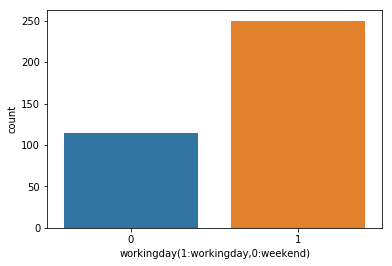

In [46]:
sns.countplot(data_2011.workingday);
plt.xlabel('workingday(1:workingday,0:weekend)');

上图表明一年中有大约250天工作日，110天左右为周末

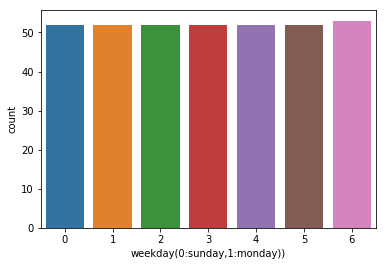

In [47]:
sns.countplot(data_2011.weekday);
plt.xlabel('weekday(0:sunday,1:monday))');

上图数据为一年中每周从周一至周日，各约50天左右

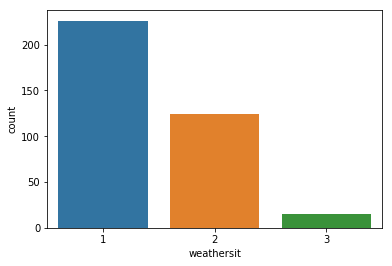

In [48]:
sns.countplot(data_2011.weathersit);
plt.xlabel('weathersit');

上图中：1表示晴天和多云，2表示雾天和阴天，3表示小雪和小雨，而没有4大雨，大雪和大雾的记录，其中1占得比例最高，2为1的一半，3最少

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


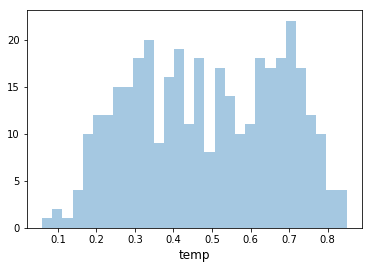

In [49]:
fig = plt.figure()
sns.distplot(data_2011.temp.values, bins=30, kde=False)
plt.xlabel('temp', fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


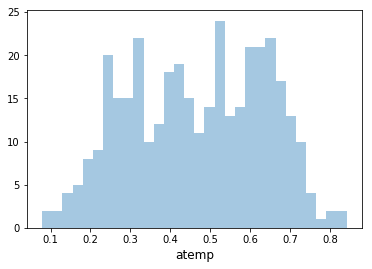

In [50]:
fig = plt.figure()
sns.distplot(data_2011.atemp.values, bins=30, kde=False)
plt.xlabel('atemp', fontsize=12)
plt.show()

上面两个图分别是气温和体感温度，可以发现两个直方图大体上很像，实际生活中，气温和体感温度的关系应该也是大致成正相关，故猜测这两个属性具有强相关性，将在相关性热图中进行验证

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


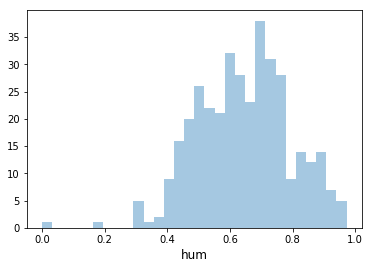

In [51]:
fig = plt.figure()
sns.distplot(data_2011.hum.values, bins=30, kde=False)
plt.xlabel('hum', fontsize=12)
plt.show()

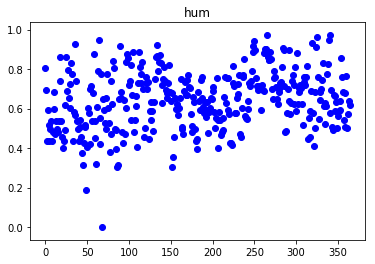

In [52]:
plt.scatter(range(data_2011.shape[0]), data_2011["hum"].values, color='blue')
plt.title("hum");

上图为湿度参数，在实际生活中，湿度与区域和天气有关，故预测该属性可能和数据中的天气属性存在相关性，在直方图中数据基本集中在右侧，湿度在0.4-1.0之间，而左侧的0.0和0.2数据量很少，在散点图中，0.0和0.2两个数据明显偏离了其他的数据群，故在实际训练中应作为离群点剔除，避免对预测准确性的影响

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


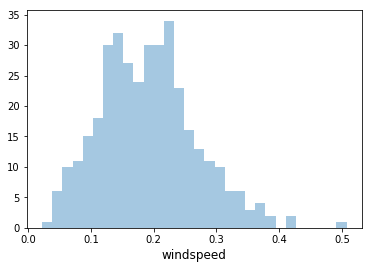

In [53]:
fig = plt.figure()
sns.distplot(data_2011.windspeed.values, bins=30, kde=False)
plt.xlabel('windspeed', fontsize=12)
plt.show()

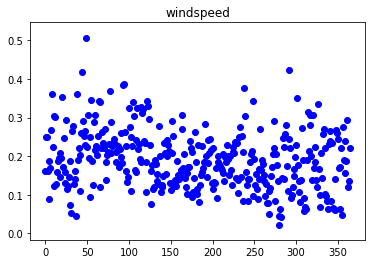

In [54]:
plt.scatter(range(data_2011.shape[0]), data_2011["windspeed"].values, color='blue')
plt.title("windspeed");

上图为风度的数据直方图和散点图，可以看出数据有点符合正态分布，但0.4和0.5的数据似乎偏离了整体的数据集，大于0.4的数据集特别少，在散点图中表现的更明显些，故在实际训练中可以将大于0.4的数据剔除，提高预测准确性

# 两两特征之间的相关性

如上方对数据的分析，在做相关性探索之前先将属性一、二、四移除掉，即drop掉目录号、日期和年份，注册用户数和非注册用户数虽然在实际训练中也会移除，但想查看一下它们和租车数量之前的相关性如何，暂时保留

In [55]:
data_2011.shape

(365, 16)

In [56]:
data_2011_pre0 = data_2011.drop('instant', axis = 1)
data_2011_pre1 = data_2011_pre0.drop('dteday', axis = 1)
data_2011_pre = data_2011_pre1.drop('yr', axis = 1)

In [57]:
data_2011_pre.shape

(365, 13)

In [58]:
cols=data_2011_pre.columns

data_2011_pre_corr = data_2011_pre.corr().abs()

In [59]:
data_2011_pre_corr.shape

(13, 13)

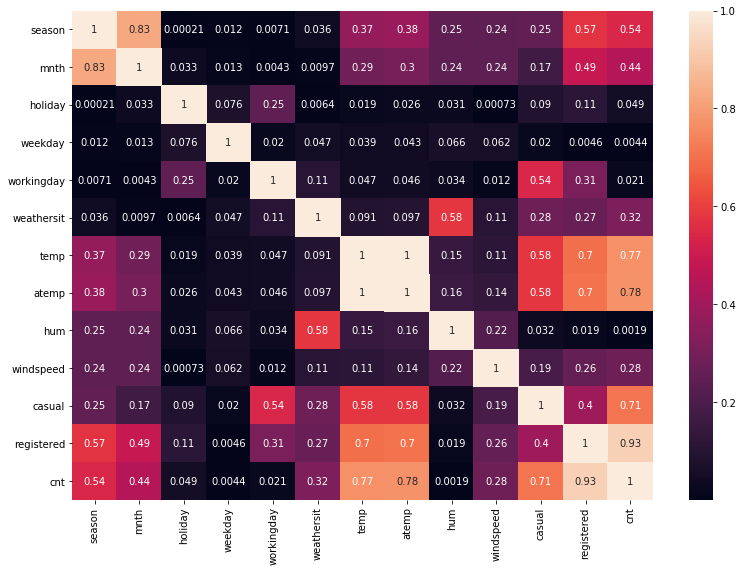

In [60]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_2011_pre_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_2011_pre_corr, mask=data_2011_pre_corr < 1, cbar=False)

plt.savefig('data_2011_pre_corr.png' )
plt.show()

In [61]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_2011_pre_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_2011_pre_corr.iloc[i,j] >= threshold and data_2011_pre_corr.iloc[i,j] < 1) or (data_2011_pre_corr.iloc[i,j] < 0 and data_2011_pre_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_2011_pre_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

temp and atemp = 1.00
registered and cnt = 0.93
season and mnth = 0.83
atemp and cnt = 0.78
temp and cnt = 0.77
casual and cnt = 0.71
atemp and registered = 0.70
temp and registered = 0.70
weathersit and hum = 0.58
atemp and casual = 0.58
temp and casual = 0.58
season and registered = 0.57
season and cnt = 0.54
workingday and casual = 0.54


通常认为相关系数大于0.5时属于强相关，故此处的阈值选择0.5

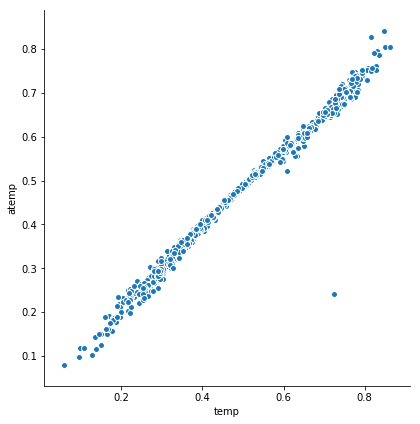

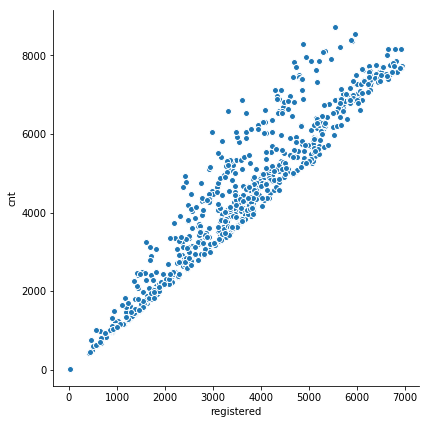

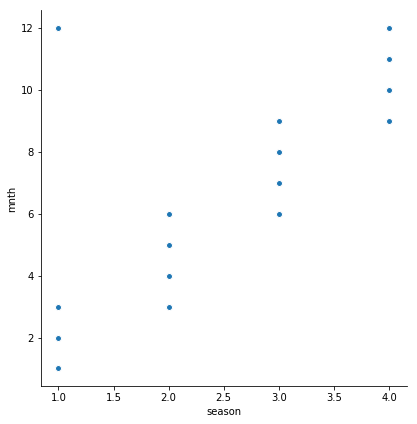

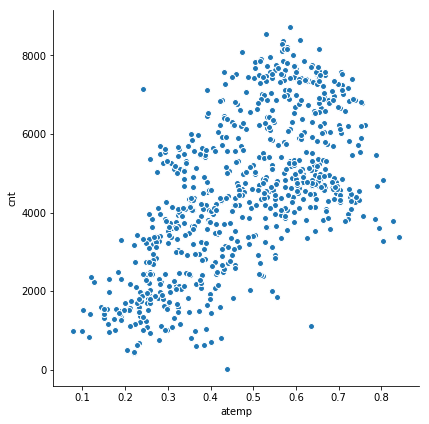

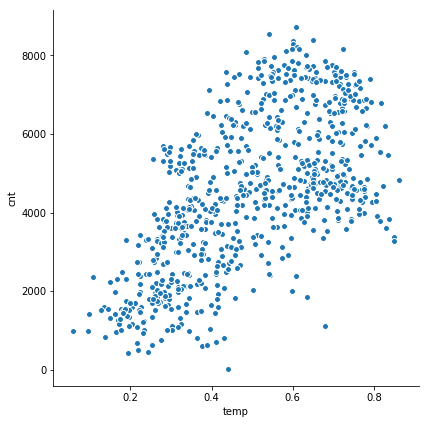

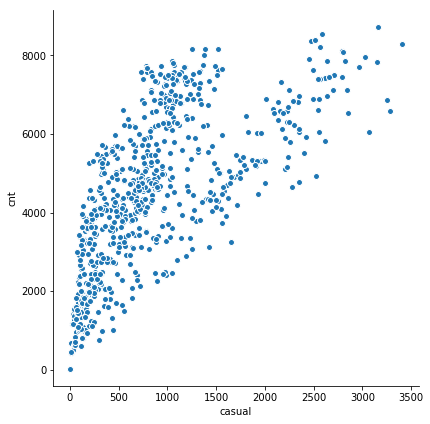

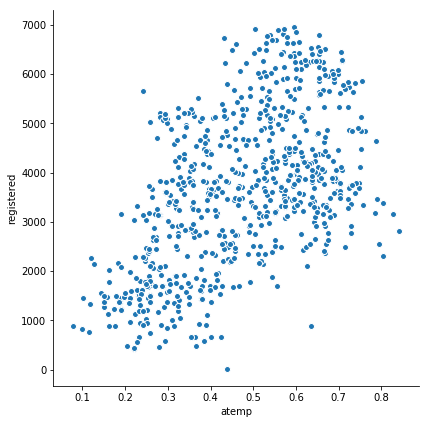

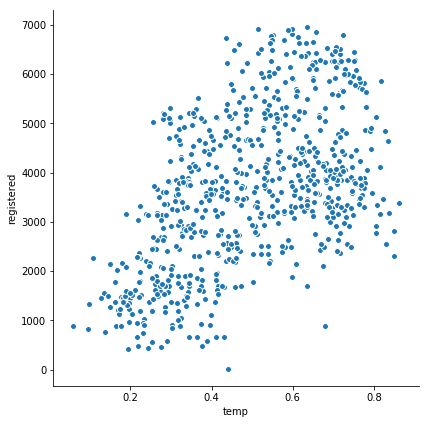

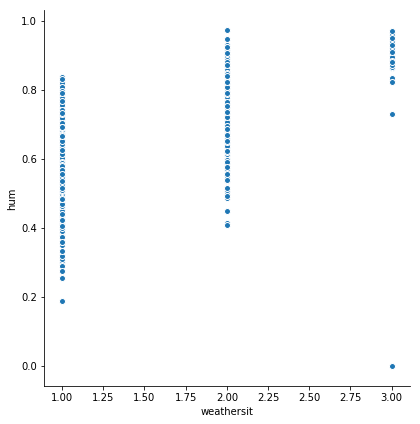

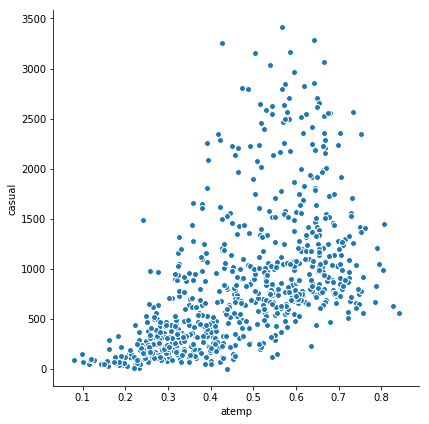

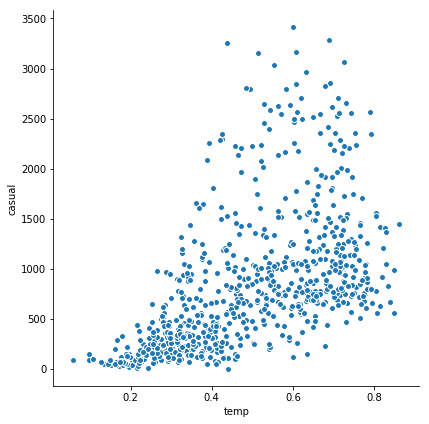

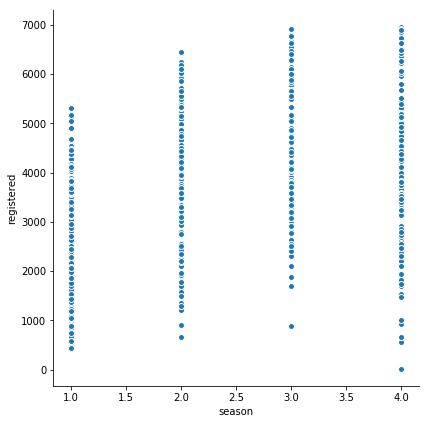

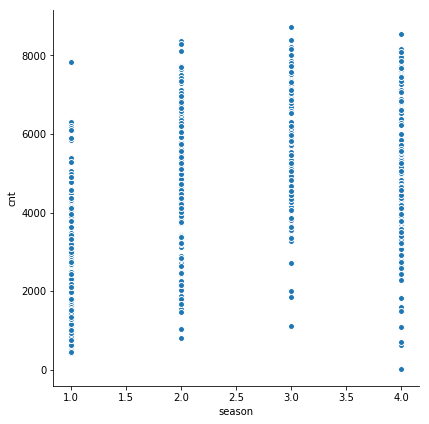

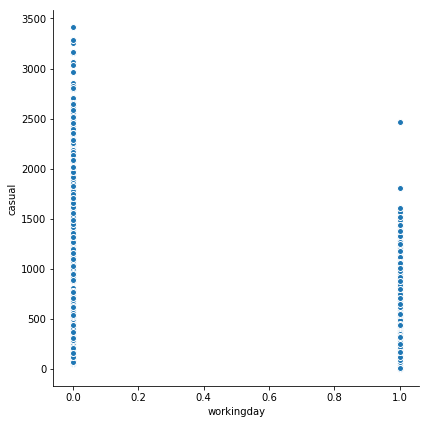

In [62]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

由上述的热图和坐标图可看出

强线性相关：

1、气温和体感温度的相关性达到1，基本属于完全相关类型，之前的分析得到了验证，为了避免重复，在实际训练需剔除其中一个属性

2、注册用户数和租车数量的相关性达到0.93，相关性很强，也验证了对数据的分析，在实际生活中，用户既然进行了注册，则使用共享单车的几率就更高了，根据数据表也可以发现，租用单车的数量等于注册用户和非注册用户之和

3、季节和月份也表现出了很强的相关性，达到0.83，可能是月份的信息包含了季节，如12-3月份属于春季，3-6月份属于夏季，6-9月份属于秋季，9-12月份属于冬季

4、气温与输出值cnt的相关性散点图 和 体感温度与输出值cnt的相关性散点图 基本一致，是因为这两个特征完全相关

弱线性相关：

从热图中可以看出，和真值y（cnt）相关性特别差的有两个属性，分别是星期中的哪天（0.0044）和湿度（0.0019），猜测一星期分为7天，但对于使用单车的数量来说，周一至周五可能使用量和周末的使用量会有所差别，但周一到周五之间的五天可能差别不是很明显，所以导致了相关性比较差。另一方面，只要不是特殊情况，湿度是人们平时在户外不那么关注的一个指标，所以对是否租借共享单车可能没有直接联系。还有另一种可能，就是这两个属性虽然线性相关性较弱，但可能存在其他的非线性相关